In [136]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from plotnine import *
import seaborn as sns

In [111]:
# check path and read file csv
import os 
print(os.getcwd())
path = 'Auto.csv'
df = pd.read_csv(path)

/Users/pudit/stat_inf_model


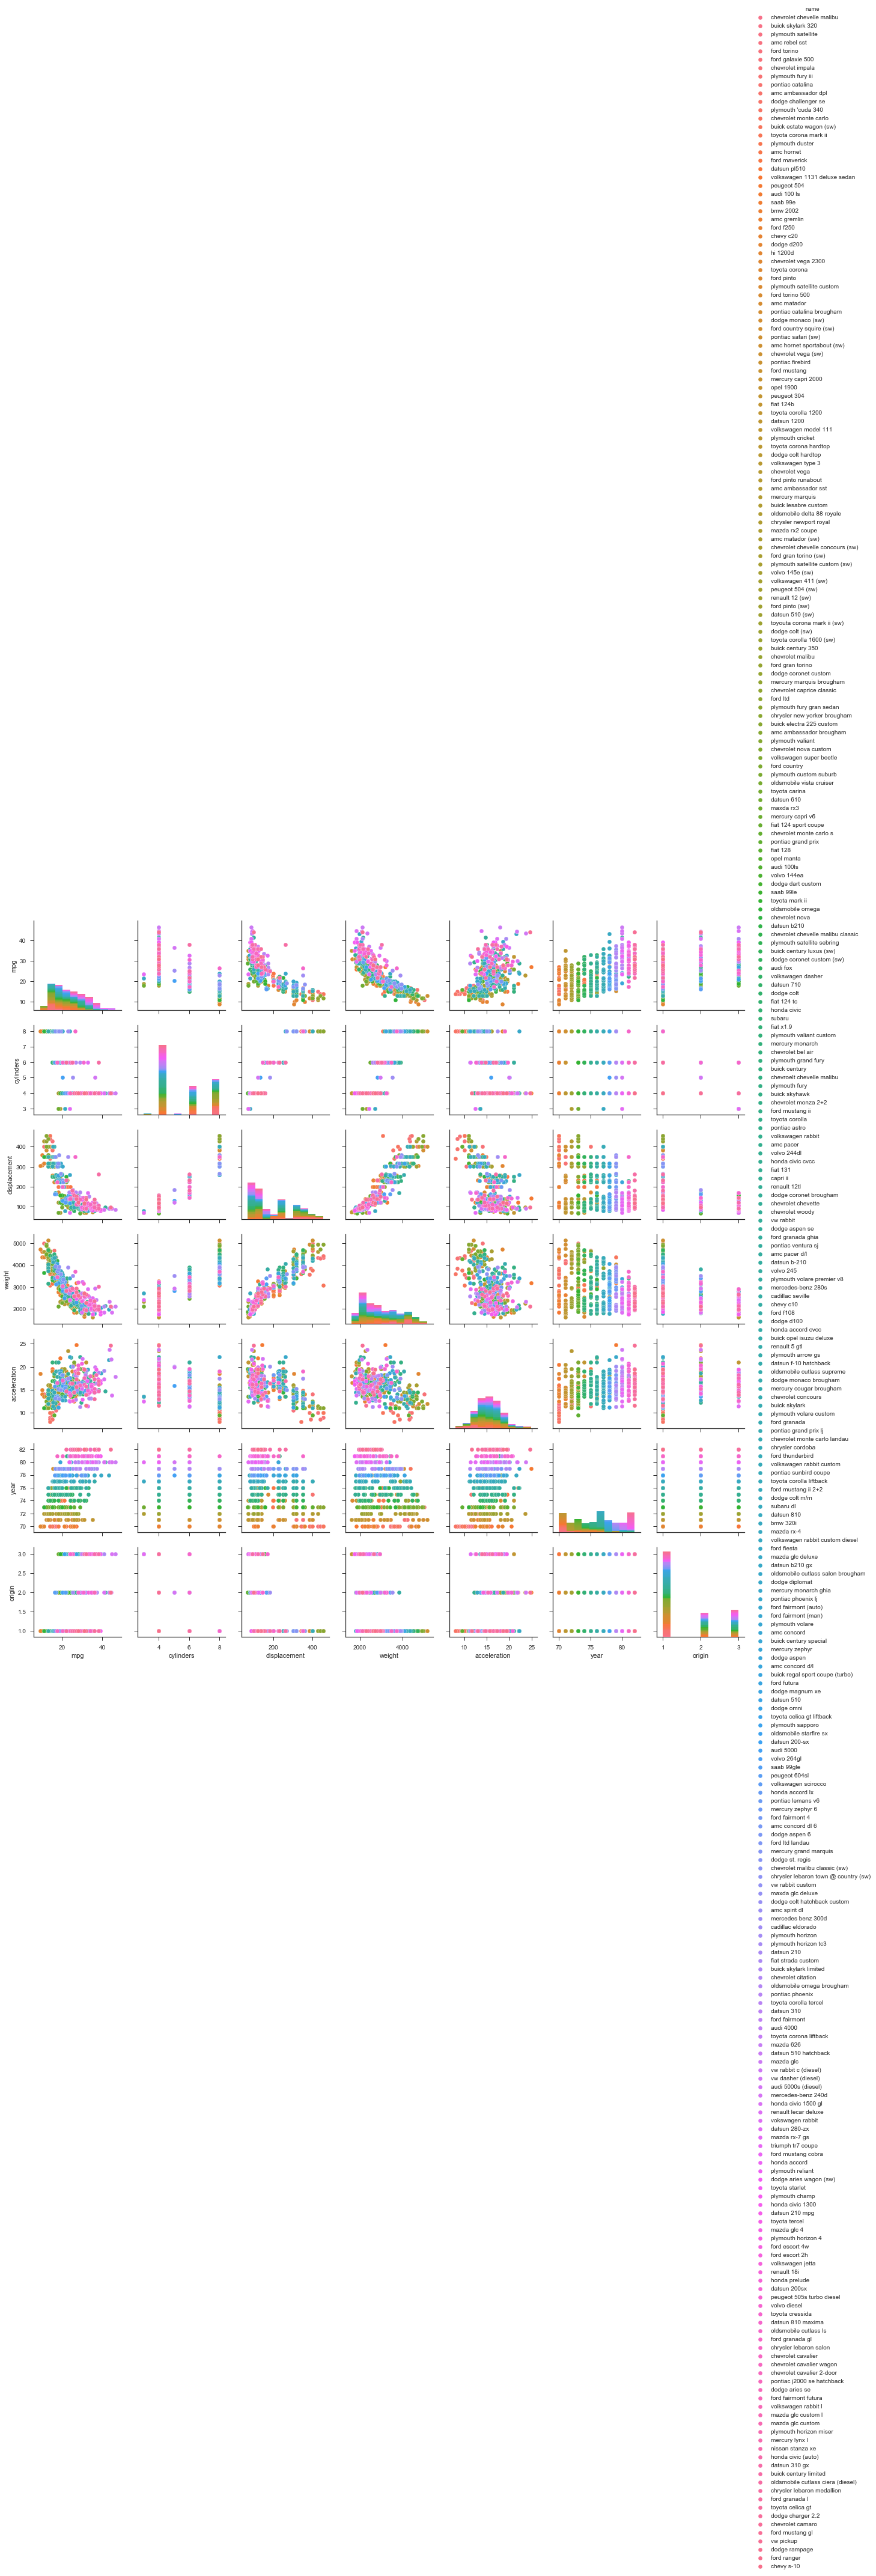

In [140]:
# sns.pairplot(df)
sns.pairplot(df, hue="name")

In [112]:
# see data's detail 
df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [113]:
# check null 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [114]:
# correlation 
df.corr()

,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000


In [124]:
pairs(df[:,0:8], pch = 19)

NameError: name 'pairs' is not defined

In [116]:
df.groupby(['horsepower']).size()

horsepower
100    17
102     1
103     1
105    12
107     1
108     1
110    18
112     3
113     1
115     5
116     1
120     4
122     1
125     3
129     2
130     5
132     1
133     1
135     1
137     1
138     1
139     2
140     7
142     1
145     7
148     1
149     1
150    22
152     1
153     2
       ..
69      3
70     12
71      5
72      6
74      3
75     14
76      4
77      1
78      6
79      2
80      7
81      2
82      1
83      4
84      6
85      9
86      5
87      2
88     19
89      1
90     20
91      1
92      6
93      1
94      1
95     14
96      3
97      9
98      2
?       5
Length: 94, dtype: int64

In [117]:
model = smf.ols(formula = 'mpg ~ cylinders+ displacement+ weight+ acceleration+ \
        year+ origin ',data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     298.9
Date:                Thu, 14 Feb 2019   Prob (F-statistic):          1.72e-142
Time:                        23:50:17   Log-Likelihood:                -1037.7
No. Observations:                 397   AIC:                             2089.
Df Residuals:                     390   BIC:                             2117.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -20.1358      4.145     -4.858   

In [118]:
x = ['cylinders', 'displacement', 'weight','acceleration', 'year', 'origin']

In [125]:
# log(x)
dflog = df[['mpg']+x]
dflog[x] = np.log(dflog[x])
modelog = smf.ols(formula = 'mpg ~ cylinders+ displacement+ weight+ acceleration+ \
        year+ origin ',data = dflog).fit()
print(modelog.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     345.2
Date:                Thu, 14 Feb 2019   Prob (F-statistic):          1.31e-152
Time:                        23:57:33   Log-Likelihood:                -1013.9
No. Observations:                 397   AIC:                             2042.
Df Residuals:                     390   BIC:                             2070.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -81.1712     17.434     -4.656   

In [128]:
# sqrt(x)
dfsq = df[['mpg']+x]
dfsq[x] = np.sqrt(dfsq[x])
modelsq = smf.ols(formula = 'mpg ~ cylinders+ displacement+ weight+ acceleration+ \
        year+ origin ',data = dfsq).fit()
print(modelsq.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     322.0
Date:                Thu, 14 Feb 2019   Prob (F-statistic):          1.11e-147
Time:                        23:58:08   Log-Likelihood:                -1025.5
No. Observations:                 397   AIC:                             2065.
Df Residuals:                     390   BIC:                             2093.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -61.9559      8.010     -7.735   

In [127]:
# x^2
df2 = df[['mpg']+x]
df2[x] = np.power(df2[x],2)
model2 = smf.ols(formula = 'mpg ~ cylinders+ displacement+ weight+ acceleration+ \
        year+ origin ',data = df2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     256.2
Date:                Thu, 14 Feb 2019   Prob (F-statistic):          5.95e-132
Time:                        23:58:00   Log-Likelihood:                -1062.4
No. Observations:                 397   AIC:                             2139.
Df Residuals:                     390   BIC:                             2167.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4763      2.226      0.214   